## K-means(K-평균) 알고리즘

라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # matplotlib 3차원 도구

from sklearn import cluster
from sklearn import datasets
from sklearn import metrics

#### 데이터준비

In [2]:
X = np.array([[2, 4], [2, 8], [2, 0],
              [8, 9], [4, 0], [0, 4]])
X

array([[2, 4],
       [2, 8],
       [2, 0],
       [8, 9],
       [4, 0],
       [0, 4]])

In [3]:
X.shape # 6개의 행, 2개의 열

(6, 2)

#### 모델 학습

In [6]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [5]:
X

array([[2, 4],
       [2, 8],
       [2, 0],
       [8, 9],
       [4, 0],
       [0, 4]])

분류 결과

In [7]:
print("Clusters : ", kmeans.labels_)

Clusters :  [0 1 0 1 0 0]


중심값

In [8]:
print("Cluster centroids: ", kmeans.cluster_centers_)

Cluster centroids:  [[2.  2. ]
 [5.  8.5]]


#### 모델 테스트

In [9]:
# [0, 0], [8, 4]
print("Prediction cluster of [0, 0], [8, 4]: ", (kmeans.predict([[0, 0], [8, 4]]))) 

Prediction cluster of [0, 0], [8, 4]:  [0 1]


<br>

### K-means for Iris data

#### 데이터 준비

In [10]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

#### 모델 생성 및 학습

- 클러스터 8개

In [11]:
model = cluster.KMeans(n_clusters=8)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
print(model.labels_[:20]) # 라벨링(클러스터) 결과

[0 7 7 7 0 0 7 0 7 7 0 7 7 7 0 0 0 0 0 0]


- 여러 모델 생성 (클러스터 8개 / 3개 / 3개(센터값 랜덤)

In [13]:
# 3개 모델 생성

estimators = [('k=8', cluster.KMeans(n_clusters=8)), # 클러스터 수 8
              ('k=3', cluster.KMeans(n_clusters=3)), # 클러스터 수 3
              ('k=3(r)', cluster.KMeans(n_clusters=3, n_init=1, init='random'))] # center - random init

print(estimators[0]), print()
print(estimators[1]), print()
print(estimators[2])

('k=8', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))

('k=3', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))

('k=3(r)', KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))


#### 모델 시각화

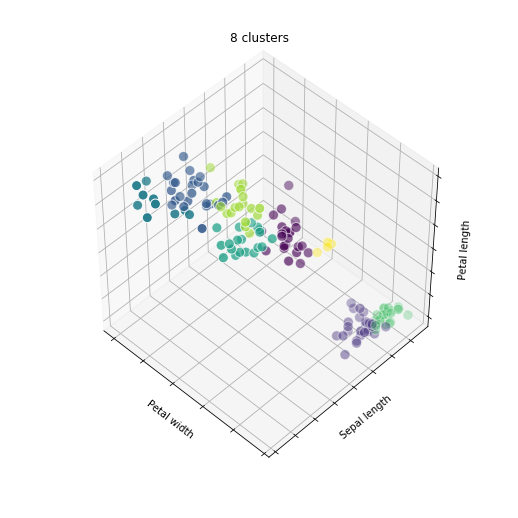

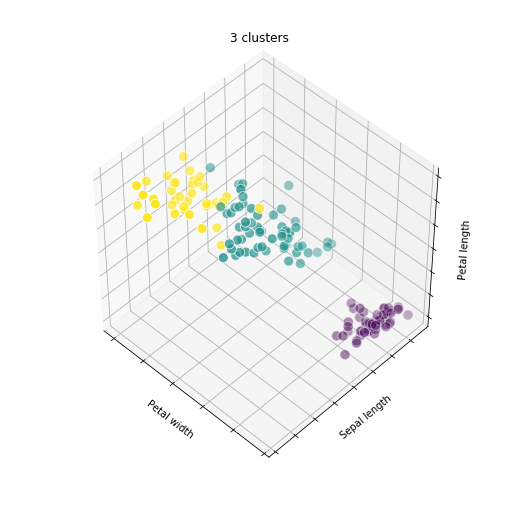

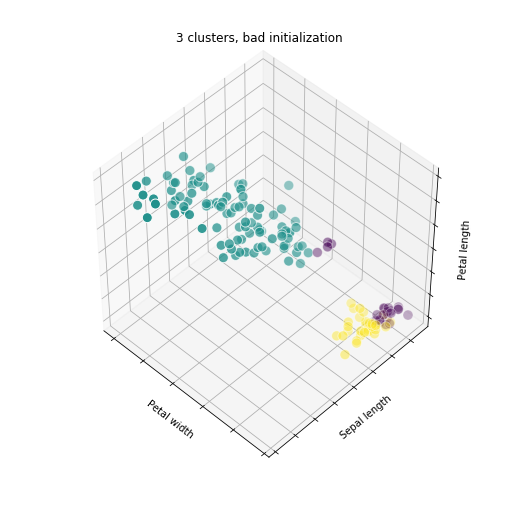

In [15]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators: 
    
    fig = plt.figure(fignum, figsize=(7, 7))
    
    # 3차원으로 바꿔줌
    ax = Axes3D(fig, elev=48, azim=134) # 고도, 방위각
    
    est.fit(X)
    
    labels = est.labels_ # 클러스터랑 결과

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='w', s=100)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    
    fignum = fignum + 1

plt.show()

3 cluster, bad initialization

- 초기 센터값 랜덤으로 설정
- 한 class에 몰리게 랜덤으로 선택되는 경우 발생

-> 최초 중심값 설정을 위한 알고리즘 k-Means++ 기본으로 사용

클러스터 라벨링 시각화

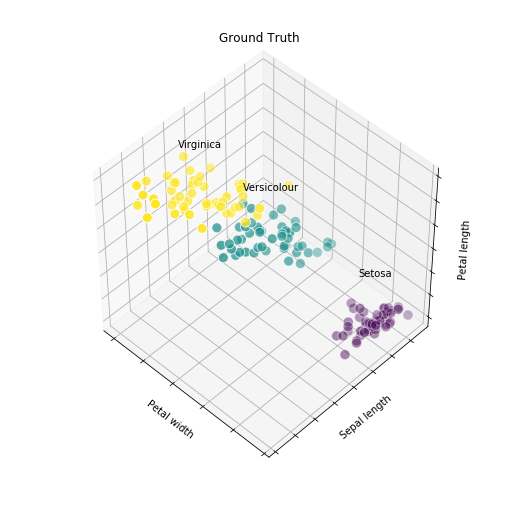

In [16]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig,  elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean()+2, 
              name, horizontalalignment='center')

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='w', s=100)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<br>

#### ++ 추가) 최적의 클러스터 개수 찾기

- 엘보우(elbow) 기법
    - SSE(Sum of Squered Errors)의 값이 점점 줄어들다가 어느 순간 줄어드는 비율이 급격하게 작아지는 부분
    - 그래프 모양에서 팔꿈치에 해당하는 부분이 바로 최적의 클러스터 개수

681.3706
152.34795176035792
78.85144142614601
57.228473214285714
46.472230158730156
39.03998724608725
34.299712121212124
30.063110617452725
28.27172172856384
26.094324740540415


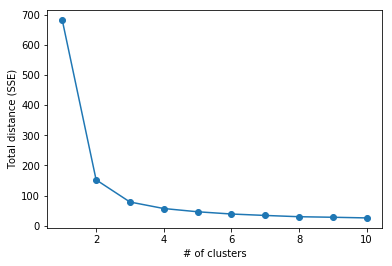

In [19]:
# 전제 조건(가설): 클러스터링을 마친 후 클러스터 내부에서는 뭉쳐있어야 하고 다른 클러스터끼리는 떨어져있어야 한다.

def elbow(X):
    
    total_distance = []
    
    for i in range(1, 11): # i: 클러스터 수, 1~10
        
        model = cluster.KMeans(n_clusters=i, random_state=0)
        model.fit(X)
        
        print(model.inertia_) # y 좌표, 샘플마다 가장 가까운(소속된) 클러스터 센터와의 거리 제곱들의 합
        total_distance.append(model.inertia_)
        
    plt.plot(range(1, 11), total_distance, marker='o')
    plt.xlabel('# of clusters')
    plt.ylabel('Total distance (SSE)')
    plt.show()

elbow(X) 

-> 2~3개

군집 수가 너무 많아져도 좋지 않음으로 inertia_가 너무 낮은 군집수는 선택하지 않음 <br>
inertia가 꺾이는 지점의 군집 수 선택 <br>
완벽한 지표가 아니라 눈으로 선택하기 때문에 객관성이 다소 떨어짐

- 실루엣(silhouette) 기법
    - 클러스터링의 품질을 정량적으로 계산해주는 방법 (k-means뿐 아니라 모든 클러스터링 기법에 적용 가능)
    - 클러스터링 끝난 후 데이터 1건마다 계산해주는 값
    
    - (분리도 - 응집도) / 최대값(응집도, 분리도)
    - 응집도(a): 동일한 클러스터 내의 나머지 데이터들과의 평균거리
    - 분리도(b): 다른 클러스터 내의 모든 데이터들과의 평균거리
    - 응집도(a)는 낮고(0) 분리도(b)는 높도아야함
    - 실루엣의 이상값은 1, 1에 가까울수록 좋음

In [21]:
model = cluster.KMeans(n_clusters=3)
model.fit(X)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [22]:
result = model.fit_predict(X) 
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

The average silhouette value is 0.68 (near 0.7 or 0.7+ : desirable)


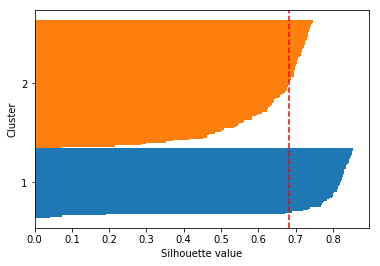

In [23]:
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plotSilhouette(X, y_fitted):
    cluster_labels = np.unique(y_fitted)
    n_clusters = cluster_labels.shape[0] # ex) (3,) -> 3
    silhouette_vals = silhouette_samples(X, y_fitted, metric='euclidean') # y_fitted 클러스터 라벨을 기준으로 한 X 데이터 각각이 가지는 실루엣 계수를 계산
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for index, label in enumerate(cluster_labels):
        cluster_silhouette_vals = silhouette_vals[y_fitted == label] # 각 라벨(center=3이면 0,1,2)에 해당하는 예측 데이터들의 실루엣 계수
        cluster_silhouette_vals.sort()
        
        # 라벨 순서대로 클러스터로 할당된 데이터 수만큼 y_ax_upper 에 더하여 y축 방향으로 쌓음
        y_ax_upper += len(cluster_silhouette_vals) 
        
        plt.barh(range(y_ax_lower, y_ax_upper), cluster_silhouette_vals, height=1.0) # barh(y, data), edge_color=None
        yticks.append((y_ax_lower + y_ax_upper) / 2) # 그래프에서 y축 위에 클러스터 번호 라벨링 적용
        
        # 라벨 순서대로 클러스터로 할당된 데이터 수만큼 y_ax_lower 에 더하여 y축 방향으로 쌓음
        y_ax_lower += len(cluster_silhouette_vals) 
        
    silhouette_avg = np.mean(silhouette_vals) # 전체 데이터에 대한 실루엣 계수의 평균
    plt.axvline(silhouette_avg, color='red', linestyle='--') # 전체 데이터에 대한 실루엣 계수의 평균을 수직선으로 표시
    print('The average silhouette value is', round(silhouette_avg, 2), '(near 0.7 or 0.7+ : desirable)')
    
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette value')
    plt.show()

model = cluster.KMeans(n_clusters=2) # Change the number of clusters
y_fitted = model.fit_predict(X)
plotSilhouette(X, y_fitted)

데이터마다의 실루에값 추이로 빨간색 선이 평균, 0.7정도가 적당함을 알 수 있음

클러스터 수에 따른 실루엣 계수 확인

In [24]:
from sklearn.metrics import silhouette_score

model = cluster.KMeans(n_clusters=2) # Change the number of clusters
y_fitted = model.fit_predict(X)

silhouette_avg = silhouette_score(X, y_fitted)
print("The average of silhouette coefficients is :", silhouette_avg)

The average of silhouette coefficients is : 0.681046169211746
